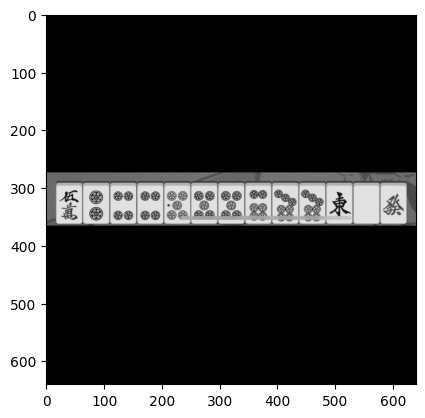

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 1. 读取图像 (支持BGR格式的彩色/灰度图)
img = cv2.imread('image.png')
assert img is not None

# 2. 灰度化
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# 3. 对比度拉伸 (Auto-Adjust Contrast)
def contrast_stretching(gray_img):
    min_val = np.min(gray_img)
    max_val = np.max(gray_img)
    stretched = ((gray_img - min_val) / (max_val - min_val) * 255).astype(np.uint8)
    return stretched

img = contrast_stretching(img)

# 4. 将图像填充为正方形
def pad_to_square(image, target_size=640, pad_color=(0, 0, 0)):
    h, w = image.shape[:2]
    scale = target_size / max(h, w)  # 计算缩放比例
    
    # 等比例缩放图像
    new_w, new_h = int(w * scale), int(h * scale)
    resized = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_LINEAR)
    
    # 计算填充量（上下或左右）
    pad_w = (target_size - new_w) // 2
    pad_h = (target_size - new_h) // 2
    pad_top = pad_h
    pad_bottom = target_size - new_h - pad_top
    pad_left = pad_w
    pad_right = target_size - new_w - pad_left
    
    # 边缘填充（这里用固定颜色填充）
    padded = cv2.copyMakeBorder(
        resized,
        top=pad_top,
        bottom=pad_bottom,
        left=pad_left,
        right=pad_right,
        borderType=cv2.BORDER_CONSTANT,
        value=pad_color
    )
    
    return padded

img = pad_to_square(img)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [12]:
from ultralytics import YOLO

model = YOLO('runs/detect/train2/weights/best.pt')
results = model(img)

# 提取检测结果
for result in results:
    boxes = result.boxes.xyxy  # 边界框坐标
    scores = result.boxes.conf  # 置信度分数
    classes = result.boxes.cls  # 类别索引
    
    # 如果有类别名称，可以通过类别索引获取
    class_names = [model.names[int(cls)] for cls in classes]
    
    # 打印检测结果
    for box, score, class_name in sorted(zip(boxes, scores, class_names), key=lambda x: x[0][0]):
        print(f"Class: {class_name}, Score: {score:.2f}, Box: {box}")
        


0: 640x640 1 2p, 2 4ps, 1 5m, 3 5ps, 1 6p, 2 7ps, 1 haku, 1 hatsu, 1 tou, 24.9ms
Speed: 1.2ms preprocess, 24.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Class: 5m, Score: 0.97, Box: tensor([ 17.5257, 296.4879,  61.8886, 363.2667], device='cuda:0')
Class: 2p, Score: 0.97, Box: tensor([ 65.1177, 296.9845, 108.5851, 363.1467], device='cuda:0')
Class: 4p, Score: 0.97, Box: tensor([112.0350, 297.7716, 155.0414, 363.0929], device='cuda:0')
Class: 4p, Score: 0.96, Box: tensor([158.6519, 297.7137, 202.3263, 362.2342], device='cuda:0')
Class: 5p, Score: 0.92, Box: tensor([205.6505, 296.9759, 248.6735, 360.3255], device='cuda:0')
Class: 5p, Score: 0.95, Box: tensor([251.5890, 297.3757, 295.8411, 354.5577], device='cuda:0')
Class: 5p, Score: 0.95, Box: tensor([298.3074, 297.0225, 342.1748, 354.2433], device='cuda:0')
Class: 6p, Score: 0.97, Box: tensor([344.6869, 296.2808, 389.5738, 357.9041], device='cuda:0')
Class: 7p, Score: 0.97, Box: tensor([392.4023, 296.9818, 436.